# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [ ]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [ ]:
path = '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input/'

In [ ]:
file1 = 'Car_Images.zip'
path + file1

In [ ]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall(path)
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [ ]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


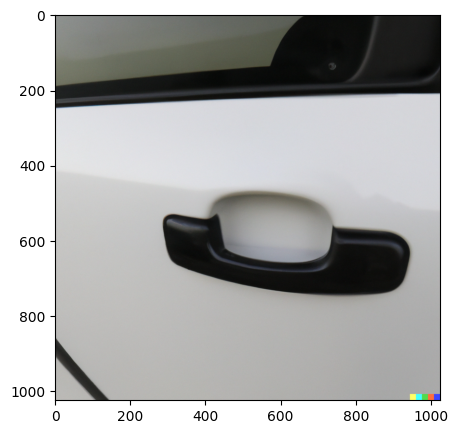

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

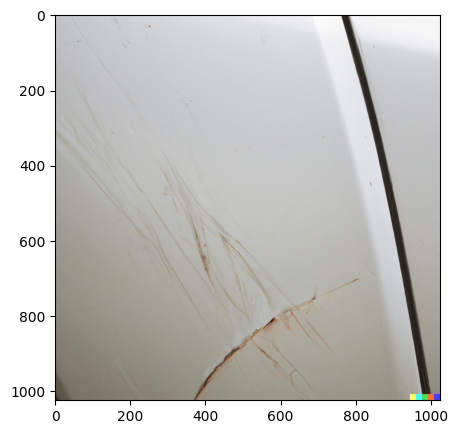

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
Y = [0]*302 + [1]*303
len(Y)

605

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [ ]:
X[:2]

['/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/normal/DALLíñE 2023-03-10 18.50.11 - photo of a part of car.png',
 '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/normal/DALLíñE 2023-03-10 18.50.18 - photo of a part of car.png']

In [ ]:
X = glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input/normal/*') + glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input/abnormal/*')
len(X)

605

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val,y_val,test_size=0.5,random_state=42)
len(x_train), len(x_val), len(x_test)

(484, 60, 61)

In [ ]:
y_train = np.array(y_train)
y_val = np.arrssay(y_val)
y_test = np.array(y_test)

#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
img_to_arr_alls = lambda imgs : np.array([keras.utils.img_to_array(keras.utils.load_img(img, target_size=(280,280,3))) for img in imgs])
x_train_arr1 = img_to_arr_alls(x_train)
x_val_arr1 = img_to_arr_alls(x_val)
x_test_arr1 = img_to_arr_alls(x_test)

In [ ]:
len(x_train_arr1)

484

### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:
os.mkdir(path+'input/')

In [ ]:
os.mkdir(path+'Dataset/')

In [ ]:
shutil.move('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/normal', '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input')
shutil.move('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/abnormal', '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input')

'/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input/abnormal'

In [ ]:
shutil.move('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Car_Images_test', '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset')
shutil.move('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Car_Images_train', '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset')
shutil.move('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Car_Images_val', '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset')

'/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/Car_Images_val'

In [ ]:
os.makedirs(path+'Car_Images_train/normal/')

In [ ]:
os.makedirs(path+'Car_Images_val/normal/')
os.makedirs(path+'Car_Images_test/normal/')
os.makedirs(path+'Car_Images_train/abnormal/')
os.makedirs(path+'Car_Images_val/abnormal/')
os.makedirs(path+'Car_Images_test/abnormal/')

#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(path+"input/", output=path+"Dataset/", ratio=(.8,.1,.1), group_prefix=1)

Copying files: 605 files [00:14, 42.04 files/s]


#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
tr_no = glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/train/'+'normal/*')
tr_ano=glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/train/'+'abnormal/*')
val_no = glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/val/'+'normal/*')
val_ano=glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/val/'+'abnormal/*')
te_no = glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/test/'+'normal/*')
te_ano=glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/test/'+'abnormal/*')

In [ ]:
img = keras.utils.load_img('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/input/normal/DALLíñE 2023-03-10 18.50.11 - photo of a part of car.png', target_size=(280,280))
img_tensor = keras.utils.img_to_array(img)
img_tensor

In [ ]:
img_to_arr_alls = lambda imgs : np.array([keras.utils.img_to_array(keras.utils.load_img(img, target_size=(280,280,3))) for img in imgs])

In [ ]:
train_no_arr = img_to_arr_alls(tr_no)
test_no_arr = img_to_arr_alls(te_no)
test_ano_arr = img_to_arr_alls(te_ano)

NameError: ignored

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
## 세션 클리어
clear_session()
## 레이어 엮기
X = Input(shape=(280,280,3))
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(X)
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Flatten()(H)
H = Dense(1024, activation='relu')(H)
H = BatchNormalization()(H)

Y = Dense(1, activation='sigmoid')(H)
## 모델 시작과 끝 지정
model=Model(X, Y)
## 모델 컴파일
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics='accuracy')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 280, 280, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 140, 140, 64)      0     

#### 2) 학습

In [ ]:
len(y_train)

484

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(x_train_arr1, y_train, epochs=1000, callbacks=[es], validation_data=(x_val_arr1, y_val), verbose=1)

Epoch 1/1000
16/16 [==============================] - 13s 800ms/step - loss: 0.5784 - accuracy: 0.8492 - val_loss: 12.2269 - val_accuracy: 0.6000
Epoch 2/1000
16/16 [==============================] - 8s 512ms/step - loss: 0.3190 - accuracy: 0.8843 - val_loss: 4.1741 - val_accuracy: 0.6000
Epoch 3/1000
16/16 [==============================] - 8s 519ms/step - loss: 0.1935 - accuracy: 0.9380 - val_loss: 1.1977 - val_accuracy: 0.6500
Epoch 4/1000
16/16 [==============================] - 8s 513ms/step - loss: 0.1583 - accuracy: 0.9504 - val_loss: 0.7466 - val_accuracy: 0.7167
Epoch 5/1000
16/16 [==============================] - 9s 547ms/step - loss: 0.0823 - accuracy: 0.9752 - val_loss: 0.5367 - val_accuracy: 0.8000
Epoch 6/1000
16/16 [==============================] - 7s 451ms/step - loss: 0.0415 - accuracy: 0.9917 - val_loss: 0.7279 - val_accuracy: 0.7667
Epoch 7/1000
16/16 [==============================] - 7s 448ms/step - loss: 0.0637 - accuracy: 0.9814 - val_loss: 0.6989 - val_accurac

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
from sklearn.metrics import *

In [ ]:
y_pred1 = model.predict(x_test_arr1)
result=[]
for i in y_pred1:
    if i<0.5:
        result.append(0)
    else:
        result.append(1)
result[:3]

2/2 [==============================] - 0s 103ms/step


[1, 1, 0]

In [ ]:
y_pred = (y_pred>0.5).astype('int')

In [ ]:
print(confusion_matrix(y_test, result))
print('='*50)
print(classification_report(y_test, result))

[[26  6]
 [10 19]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        32
           1       0.76      0.66      0.70        29

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
max_n, min_n = x_train_arr1.max(), x_train_arr1.min()
max_n, min_n

(255.0, 0.0)

In [ ]:
train_x = (x_train_arr1 - min_n)/(max_n - min_n)
val_x = (x_val_arr1 - min_n)/(max_n - min_n)
test_x = (x_test_arr1 - min_n)/(max_n - min_n)
train_x.max(), train_x.min()

(1.0, 0.0)

In [ ]:
## 세션 클리어
clear_session()
## 레이어 엮기
X = Input(shape=(280,280,3))
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(X)
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Flatten()(H)
H = Dense(1024, activation='relu')(H)
H = BatchNormalization()(H)

Y = Dense(1, activation='sigmoid')(H)
## 모델 시작과 끝 지정
model2=Model(X, Y)
## 모델 컴파일
model2.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics='accuracy')

#### 2) 학습

In [ ]:
model2.fit(train_x, y_train, epochs=1000, callbacks=[es], validation_data=(val_x, y_val), verbose=1)

NameError: ignored

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
y_pred2 = model2.predict(test_x)
result2=[]
for i in y_pred2:
    if i<0.5:
        result2.append(0)
    else:
        result2.append(1)
result2[:3]

In [ ]:
print(confusion_matrix(y_test, result2))
print('='*50)
print(classification_report(y_test, result2))

### (3) 모델 3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
clear_session()

model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(280, 280, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### 2) 학습

In [ ]:
model3.fit(x_train_arr1, y_train, epochs=1000, callbacks=[es], validation_data=(x_val_arr1, y_val), verbose=1 )

Epoch 1/1000
16/16 [==============================] - 5s 137ms/step - loss: 1.2413 - accuracy: 0.6116 - val_loss: 0.5476 - val_accuracy: 0.7500
Epoch 2/1000
16/16 [==============================] - 1s 47ms/step - loss: 0.4417 - accuracy: 0.8161 - val_loss: 0.9150 - val_accuracy: 0.5500
Epoch 3/1000
16/16 [==============================] - 1s 50ms/step - loss: 0.3324 - accuracy: 0.8512 - val_loss: 0.5296 - val_accuracy: 0.8000
Epoch 4/1000
16/16 [==============================] - 1s 50ms/step - loss: 0.2781 - accuracy: 0.8864 - val_loss: 0.4921 - val_accuracy: 0.8000
Epoch 5/1000
16/16 [==============================] - 1s 56ms/step - loss: 0.1910 - accuracy: 0.9256 - val_loss: 0.5313 - val_accuracy: 0.8167
Epoch 6/1000
16/16 [==============================] - 1s 54ms/step - loss: 0.1107 - accuracy: 0.9690 - val_loss: 0.7097 - val_accuracy: 0.7667
Epoch 7/1000
16/16 [==============================] - 1s 60ms/step - loss: 0.0548 - accuracy: 0.9835 - val_loss: 0.7852 - val_accuracy: 0.833

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
y_pred3 = model3.predict(x_test_arr1)
result3=[]
for i in y_pred3:
    if i<0.5:
        result3.append(0)
    else:
        result3.append(1)
result3[:3]

2/2 [==============================] - 1s 397ms/step


[1, 1, 0]

In [ ]:
print(confusion_matrix(y_test, result3))
print('='*50)
print(classification_report(y_test, result3))

[[31  1]
 [12 17]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.94      0.59      0.72        29

    accuracy                           0.79        61
   macro avg       0.83      0.78      0.78        61
weighted avg       0.83      0.79      0.78        61



## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [ ]:
# trainIDG = ImageDataGenerator(rescale=1./255,         # 사실 이 부분은 전처리 과정에서 했다.
#                               zca_whitening=True,     # apply ZCA whitening
#                               rotation_range=30,      # randomly rotate images in the range (degrees, 0 to 180)
#                               zoom_range = 0.2,       # randomly zoom image
#                               width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#                               height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
#                               horizontal_flip=True,   # randomly flip images
#                               vertical_flip=True)     # randomly flip images
# trainIDG = ImageDataGenerator(
#                          rescale=1./255,
#                          rotation_range=50,      # 이미지 회전
#                          width_shift_range=0.3,  # 이미지 좌우 이동
#                          height_shift_range=0.3, # 이미지 상하 이동
#                          zoom_range=0.8,         # 확대/축소 범위
#                          shear_range=0.5,        # 비스듬히 늘림
#                          horizontal_flip=True,   # 가로 전환
#                          vertical_flip=True,     # 세로 전환
#                          fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [ ]:
train_datagen = ImageDataGenerator(
                         rescale=1./255,
                         rotation_range=50,      # 이미지 회전
                         width_shift_range=0.15,  # 이미지 좌우 이동
                         height_shift_range=0.15, # 이미지 상하 이동
                         zoom_range=0.5,         # 확대/축소 범위
                         shear_range=0.3,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

test_datagen = ImageDataGenerator(rescale=1./255)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/train',
        target_size=(280, 280),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/val',
        target_size=(280, 280),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/test',
        target_size=(280, 280),
        batch_size=32,
        class_mode='binary',
        shuffle=False
        )

Found 483 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
train_generator.next()

In [ ]:
train_generator.class_indices

{'abnormal': 0, 'normal': 1}

In [ ]:
len(glob.glob('/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/Dataset/train/abnormal/*'))

242

In [ ]:
list(train_generator.classes).count(0)

242

#### 3) 구조 설계

In [ ]:
## 세션 클리어
clear_session()
## 레이어 엮기
X = Input(shape=(280,280,3))
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(X)
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Flatten()(H)
H = Dense(1024, activation='relu')(H)
H = BatchNormalization()(H)

Y = Dense(1, activation='sigmoid')(H)
## 모델 시작과 끝 지정
model2=Model(X, Y)
## 모델 컴파일
model2.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics='accuracy')

In [ ]:
from tensorflow.keras import layers
clear_session()

model3 = Sequential([
  #layers.Rescaling(1./255, input_shape=(280, 280, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### 4) 학습

In [ ]:
test_generator.class_indices

{'abnormal': 0, 'normal': 1}

In [ ]:
model3.fit(
        train_generator,
        epochs=1000,
        validation_data=validation_generator,
        callbacks=[es],
        verbose=1,)

Epoch 1/1000
16/16 [==============================] - 55s 2s/step - loss: 0.8722 - accuracy: 0.5424 - val_loss: 0.6503 - val_accuracy: 0.7333
Epoch 2/1000
16/16 [==============================] - 30s 2s/step - loss: 0.6123 - accuracy: 0.7039 - val_loss: 0.5363 - val_accuracy: 0.7500
Epoch 3/1000
16/16 [==============================] - 32s 2s/step - loss: 0.5458 - accuracy: 0.7619 - val_loss: 0.4899 - val_accuracy: 0.8000
Epoch 4/1000
16/16 [==============================] - 29s 2s/step - loss: 0.5103 - accuracy: 0.7536 - val_loss: 0.4914 - val_accuracy: 0.8167
Epoch 5/1000
16/16 [==============================] - 29s 2s/step - loss: 0.5127 - accuracy: 0.7764 - val_loss: 0.4894 - val_accuracy: 0.8000
Epoch 6/1000
16/16 [==============================] - 29s 2s/step - loss: 0.4999 - accuracy: 0.7785 - val_loss: 0.5243 - val_accuracy: 0.7667
Epoch 7/1000
16/16 [==============================] - 29s 2s/step - loss: 0.4727 - accuracy: 0.7867 - val_loss: 0.4685 - val_accuracy: 0.8333
Epoch 

#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
test_generator.classes

In [ ]:
len(test_generator.classes)

In [ ]:
y_test3 = test_generator.classes

In [ ]:
y_pred3 = model3.predict(test_generator)
result3=[]
for i in y_pred3:
    if i<0.5:
        result3.append(0)
    else:
        result3.append(1)
result3[:3]

2/2 [==============================] - 19s 18s/step


[1, 0, 1]

In [ ]:
result3

In [ ]:
print(confusion_matrix(y_test3, result3))
print('='*50)
print(classification_report(y_test3, result3))

[[23  8]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.79      0.97      0.87        31

    accuracy                           0.85        62
   macro avg       0.87      0.85      0.85        62
weighted avg       0.87      0.85      0.85        62



### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16()
base_model.summary()

553467096/553467096 [==============================] - 25s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [ ]:
base_model = VGG16(input_shape=(280, 280, 3), include_top=False, weights='imagenet')
base_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                              

In [ ]:
# 모든 레이어를 동결합니다.
for layer in base_model.layers:
    layer.trainable = False

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
output = base_model.output
X = GlobalAveragePooling2D()(output)
X = Dense(258, activation='relu')(X)
Y = Dense(1, activation='sigmoid', name='output')(X)
model = Model(inputs=base_model.input, outputs=Y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 70, 70, 128)       0     

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,
        epochs=1000,
        validation_data=validation_generator,
        callbacks=[es],
        verbose=1)

Epoch 1/1000
16/16 [==============================] - 48s 3s/step - loss: 0.6031 - accuracy: 0.6605 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 2/1000
16/16 [==============================] - 44s 3s/step - loss: 0.4920 - accuracy: 0.7764 - val_loss: 0.4123 - val_accuracy: 0.8333
Epoch 3/1000
16/16 [==============================] - 30s 2s/step - loss: 0.3933 - accuracy: 0.8364 - val_loss: 0.3714 - val_accuracy: 0.8167
Epoch 4/1000
16/16 [==============================] - 30s 2s/step - loss: 0.3965 - accuracy: 0.8323 - val_loss: 0.3490 - val_accuracy: 0.8333
Epoch 5/1000
16/16 [==============================] - 31s 2s/step - loss: 0.3773 - accuracy: 0.8323 - val_loss: 0.3043 - val_accuracy: 0.8833
Epoch 6/1000
16/16 [==============================] - 33s 2s/step - loss: 0.3489 - accuracy: 0.8406 - val_loss: 0.2942 - val_accuracy: 0.8500
Epoch 7/1000
16/16 [==============================] - 29s 2s/step - loss: 0.3324 - accuracy: 0.8530 - val_loss: 0.2595 - val_accuracy: 0.8833
Epoch 

#### 4) 성능 평가

In [ ]:
test_generator.classes

NameError: ignored

In [ ]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)
result=[]
for i in y_pred:
    if i<0.5:
        result.append(0)
    else:
        result.append(1)
result[:3]

2/2 [==============================] - 9s 8s/step


[0, 0, 0]

In [ ]:
print(confusion_matrix(y_test, result))
print('='*50)
print(classification_report(y_test, result))

[[31  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



# VGG16 모델 저장

In [ ]:
model.save("/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/VGG16_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/에이블스쿨_미니프로젝트/Mini_Project6_2/VGG16_model.h5")
pred = (loaded_model.predict(test_generator)>0.5).astype('int')
print(confusion_matrix(y_test, pred))
print('='*50)
print(classification_report(y_test, pred))

2/2 [==============================] - 2s 1s/step
[[31  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

